In [1]:
import sys
import time
import os.path
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/utils/')

import data_utils as du
import graph_utils as gu

from namelist import * 

In [2]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [3]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

# Data

In [4]:
# with h5py.File(save_dir+'BASE_final_Calib-5mm_2017_2020.hdf', 'r') as h5io:
#     o_bar_5mm = h5io['o_bar'][...]
#     base_bs_5mm = h5io['brier'][...]
#     base_frac_5mm = h5io['pos_frac'][...]
#     base_pred_5mm = h5io['pred_value'][...]
#     base_use_5mm = h5io['use'][...]
    
# with h5py.File(save_dir+'SL_final_Calib-5mm_2017_2020.hdf', 'r') as h5io:
#     sl_bs_5mm = h5io['brier'][...]
#     sl_frac_5mm = h5io['pos_frac'][...]
#     sl_pred_5mm = h5io['pred_value'][...]
#     sl_use_5mm = h5io['use'][...]
    
# with h5py.File(save_dir+'BASE_CNN_Calib-5mm_2017_2020.hdf', 'r') as h5io:
#     bcnn_bs_5mm = h5io['brier'][...]
#     bcnn_frac_5mm = h5io['pos_frac'][...]
#     bcnn_pred_5mm = h5io['pred_value'][...]
#     bcnn_use_5mm = h5io['use'][...]
    
# with h5py.File(save_dir+'SL_CNN_Calib-5mm_2017_2020.hdf', 'r') as h5io:
#     scnn_bs_5mm = h5io['brier'][...]
#     scnn_frac_5mm = h5io['pos_frac'][...]
#     scnn_pred_5mm = h5io['pred_value'][...]
#     scnn_use_5mm = h5io['use'][...]

# with h5py.File(save_dir+'GEFS_Calib-5mm_2017_2020.hdf', 'r') as h5io:
#     gefs_bs_5mm = h5io['brier'][...]
#     gefs_frac_5mm = h5io['pos_frac'][...]
#     gefs_pred_5mm = h5io['pred_value'][...]
#     gefs_use_5mm = h5io['use'][...]
    
# with h5py.File(save_dir+'BASE_final_Calib-30mm_2017_2020.hdf', 'r') as h5io:
#     o_bar_30mm = h5io['o_bar'][...]
#     base_bs_30mm = h5io['brier'][...]
#     base_frac_30mm = h5io['pos_frac'][...]
#     base_pred_30mm = h5io['pred_value'][...]
#     base_use_30mm = h5io['use'][...]
    
# with h5py.File(save_dir+'SL_final_Calib-30mm_2017_2020.hdf', 'r') as h5io:
#     sl_bs_30mm = h5io['brier'][...]
#     sl_frac_30mm = h5io['pos_frac'][...]
#     sl_pred_30mm = h5io['pred_value'][...]
#     sl_use_30mm = h5io['use'][...]
    
# with h5py.File(save_dir+'BASE_CNN_Calib-30mm_2017_2020.hdf', 'r') as h5io:
#     bcnn_bs_30mm = h5io['brier'][...]
#     bcnn_frac_30mm = h5io['pos_frac'][...]
#     bcnn_pred_30mm = h5io['pred_value'][...]
#     bcnn_use_30mm = h5io['use'][...]
    
# with h5py.File(save_dir+'SL_CNN_Calib-30mm_2017_2020.hdf', 'r') as h5io:
#     scnn_bs_30mm = h5io['brier'][...]
#     scnn_frac_30mm = h5io['pos_frac'][...]
#     scnn_pred_30mm = h5io['pred_value'][...]
#     scnn_use_30mm = h5io['use'][...]

# with h5py.File(save_dir+'GEFS_Calib-30mm_2017_2020.hdf', 'r') as h5io:
#     gefs_bs_30mm = h5io['brier'][...]
#     gefs_frac_30mm = h5io['pos_frac'][...]
#     gefs_pred_30mm = h5io['pred_value'][...]
#     gefs_use_30mm = h5io['use'][...]
    
# with h5py.File(save_dir+'BASE_final_Calib-90th_2017_2020.hdf', 'r') as h5io:
#     o_bar_90th = h5io['o_bar'][...]
#     base_bs_90th = h5io['brier'][...]
#     base_frac_90th = h5io['pos_frac'][...]
#     base_pred_90th = h5io['pred_value'][...]
#     base_use_90th = h5io['use'][...]
    
# with h5py.File(save_dir+'SL_final_Calib-90th_2017_2020.hdf', 'r') as h5io:
#     sl_bs_90th = h5io['brier'][...]
#     sl_frac_90th = h5io['pos_frac'][...]
#     sl_pred_90th = h5io['pred_value'][...]
#     sl_use_90th = h5io['use'][...]
    
# with h5py.File(save_dir+'BASE_CNN_Calib-90th_2017_2020.hdf', 'r') as h5io:
#     bcnn_bs_90th = h5io['brier'][...]
#     bcnn_frac_90th = h5io['pos_frac'][...]
#     bcnn_pred_90th = h5io['pred_value'][...]
#     bcnn_use_90th = h5io['use'][...]
    
# with h5py.File(save_dir+'SL_CNN_Calib-90th_2017_2020.hdf', 'r') as h5io:
#     scnn_bs_90th = h5io['brier'][...]
#     scnn_frac_90th = h5io['pos_frac'][...]
#     scnn_pred_90th = h5io['pred_value'][...]
#     scnn_use_90th = h5io['use'][...]

# with h5py.File(save_dir+'GEFS_Calib-90th_2017_2020.hdf', 'r') as h5io:
#     gefs_bs_90th = h5io['brier'][...]
#     gefs_frac_90th = h5io['pos_frac'][...]
#     gefs_pred_90th = h5io['pred_value'][...]
#     gefs_use_90th = h5io['use'][...]

In [5]:
# def bs_3c(pred, frac, o, hist):
#     '''
#     bs three components decompose
#     '''
#     L = len(pred)
#     f = np.empty((L,))
#     r = np.empty((L,))
#     for i in range(L):
#         f[i] = np.nansum(((pred[i, :] - frac[i, :])**2)*hist[i, :])/np.sum(hist[i, :])
#         r[i] = np.nansum(((frac[i, :] - o[i])**2)*hist[i, :])/np.sum(hist[i, :])
#     return f, r

# u_5mm = (o_bar_5mm*(1-o_bar_5mm))

# base_rel_5mm, base_res_5mm = bs_3c(base_pred_5mm, base_frac_5mm, o_bar_5mm, base_use_5mm)
# sl_rel_5mm, sl_res_5mm = bs_3c(sl_pred_5mm, sl_frac_5mm, o_bar_5mm, sl_use_5mm)
# bcnn_rel_5mm, bcnn_res_5mm = bs_3c(bcnn_pred_5mm, bcnn_frac_5mm, o_bar_5mm, bcnn_use_5mm)
# scnn_rel_5mm, scnn_res_5mm = bs_3c(scnn_pred_5mm, scnn_frac_5mm, o_bar_5mm, scnn_use_5mm)
# gefs_rel_5mm, gefs_res_5mm = bs_3c(gefs_pred_5mm, gefs_frac_5mm, o_bar_5mm, gefs_use_5mm)

# base_bs_5mm = base_rel_5mm - base_res_5mm + u_5mm
# sl_bs_5mm = sl_rel_5mm - sl_res_5mm + u_5mm
# bcnn_bs_5mm = bcnn_rel_5mm - bcnn_res_5mm + u_5mm
# scnn_bs_5mm = scnn_rel_5mm - scnn_res_5mm + u_5mm
# gefs_bs_5mm = gefs_rel_5mm - gefs_res_5mm + u_5mm

# u_30mm = o_bar_30mm*(1-o_bar_30mm)

# base_rel_30mm, base_res_30mm = bs_3c(base_pred_30mm, base_frac_30mm, o_bar_30mm, base_use_30mm)
# sl_rel_30mm, sl_res_30mm = bs_3c(sl_pred_30mm, sl_frac_30mm, o_bar_30mm, sl_use_30mm)
# bcnn_rel_30mm, bcnn_res_30mm = bs_3c(bcnn_pred_30mm, bcnn_frac_30mm, o_bar_30mm, bcnn_use_30mm)
# scnn_rel_30mm, scnn_res_30mm = bs_3c(scnn_pred_30mm, scnn_frac_30mm, o_bar_30mm, scnn_use_30mm)
# gefs_rel_30mm, gefs_res_30mm = bs_3c(gefs_pred_30mm, gefs_frac_30mm, o_bar_30mm, gefs_use_30mm)

# base_bs_30mm = base_rel_30mm - base_res_30mm + u_30mm
# sl_bs_30mm = sl_rel_30mm - sl_res_30mm + u_30mm
# bcnn_bs_30mm = bcnn_rel_30mm - bcnn_res_30mm + u_30mm
# scnn_bs_30mm = scnn_rel_30mm - scnn_res_30mm + u_30mm
# gefs_bs_30mm = gefs_rel_30mm - gefs_res_30mm + u_30mm

# u_90th = o_bar_90th*(1-o_bar_90th)

# base_rel_90th, base_res_90th = bs_3c(base_pred_90th, base_frac_90th, o_bar_90th, base_use_90th)
# sl_rel_90th, sl_res_90th = bs_3c(sl_pred_90th, sl_frac_90th, o_bar_90th, sl_use_90th)
# bcnn_rel_90th, bcnn_res_90th = bs_3c(bcnn_pred_90th, bcnn_frac_90th, o_bar_90th, bcnn_use_90th)
# scnn_rel_90th, scnn_res_90th = bs_3c(scnn_pred_90th, scnn_frac_90th, o_bar_90th, scnn_use_90th)
# gefs_rel_90th, gefs_res_90th = bs_3c(gefs_pred_90th, gefs_frac_90th, o_bar_90th, gefs_use_90th)

# base_bs_90th = base_rel_90th - base_res_90th + u_90th
# sl_bs_90th = sl_rel_90th - sl_res_90th + u_90th
# bcnn_bs_90th = bcnn_rel_90th - bcnn_res_90th + u_90th
# scnn_bs_90th = scnn_rel_90th - scnn_res_90th + u_90th
# gefs_bs_90th = gefs_rel_90th - gefs_res_90th + u_90th

# BS_5mm = {}
# BS_5mm['{}_bs'.format('base')] = base_bs_5mm
# BS_5mm['{}_bs'.format('sl')] = sl_bs_5mm
# BS_5mm['{}_bs'.format('bcnn')] = bcnn_bs_5mm
# BS_5mm['{}_bs'.format('scnn')] = scnn_bs_5mm
# BS_5mm['{}_bs'.format('gefs')] = gefs_bs_5mm

# BS_5mm['{}_rel'.format('base')] = base_rel_5mm
# BS_5mm['{}_rel'.format('sl')] = sl_rel_5mm
# BS_5mm['{}_rel'.format('bcnn')] = bcnn_rel_5mm
# BS_5mm['{}_rel'.format('scnn')] = scnn_rel_5mm
# BS_5mm['{}_rel'.format('gefs')] = gefs_rel_5mm

# BS_5mm['{}_res'.format('base')] = base_res_5mm
# BS_5mm['{}_res'.format('sl')] = sl_res_5mm
# BS_5mm['{}_res'.format('bcnn')] = bcnn_res_5mm
# BS_5mm['{}_res'.format('scnn')] = scnn_res_5mm
# BS_5mm['{}_res'.format('gefs')] = gefs_res_5mm

# base_use_5mm[np.isnan(base_frac_5mm)]=0
# sl_use_5mm[np.isnan(sl_frac_5mm)]=0
# bcnn_use_5mm[np.isnan(bcnn_frac_5mm)]=0
# scnn_use_5mm[np.isnan(scnn_frac_5mm)]=0
# gefs_use_5mm[np.isnan(gefs_frac_5mm)]=0

# USE_5mm = {}
# USE_5mm['{}'.format('base')] = base_use_5mm/np.nansum(base_use_5mm)
# USE_5mm['{}'.format('sl')] = sl_use_5mm/np.nansum(sl_use_5mm)
# USE_5mm['{}'.format('bcnn')] = bcnn_use_5mm/np.nansum(bcnn_use_5mm)
# USE_5mm['{}'.format('scnn')] = scnn_use_5mm/np.nansum(scnn_use_5mm)
# USE_5mm['{}'.format('gefs')] = gefs_use_5mm/np.nansum(gefs_use_5mm)

# PLOT_5mm = {}
# PLOT_5mm['{}_p'.format('base')] = base_pred_5mm
# PLOT_5mm['{}_p'.format('sl')] = sl_pred_5mm
# PLOT_5mm['{}_p'.format('bcnn')] = bcnn_pred_5mm
# PLOT_5mm['{}_p'.format('scnn')] = scnn_pred_5mm
# PLOT_5mm['{}_p'.format('gefs')] = gefs_pred_5mm

# PLOT_5mm['{}_f'.format('base')] = base_frac_5mm
# PLOT_5mm['{}_f'.format('sl')] = sl_frac_5mm
# PLOT_5mm['{}_f'.format('bcnn')] = bcnn_frac_5mm
# PLOT_5mm['{}_f'.format('scnn')] = scnn_frac_5mm
# PLOT_5mm['{}_f'.format('gefs')] = gefs_frac_5mm

# BS_30mm = {}
# BS_30mm['{}_bs'.format('base')] = base_bs_30mm
# BS_30mm['{}_bs'.format('sl')] = sl_bs_30mm
# BS_30mm['{}_bs'.format('bcnn')] = bcnn_bs_30mm
# BS_30mm['{}_bs'.format('scnn')] = scnn_bs_30mm
# BS_30mm['{}_bs'.format('gefs')] = gefs_bs_30mm

# BS_30mm['{}_rel'.format('base')] = base_rel_30mm
# BS_30mm['{}_rel'.format('sl')] = sl_rel_30mm
# BS_30mm['{}_rel'.format('bcnn')] = bcnn_rel_30mm
# BS_30mm['{}_rel'.format('scnn')] = scnn_rel_30mm
# BS_30mm['{}_rel'.format('gefs')] = gefs_rel_30mm

# BS_30mm['{}_res'.format('base')] = base_res_30mm
# BS_30mm['{}_res'.format('sl')] = sl_res_30mm
# BS_30mm['{}_res'.format('bcnn')] = bcnn_res_30mm
# BS_30mm['{}_res'.format('scnn')] = scnn_res_30mm
# BS_30mm['{}_res'.format('gefs')] = gefs_res_30mm

# base_use_30mm[np.isnan(base_frac_30mm)]=0
# sl_use_30mm[np.isnan(sl_frac_30mm)]=0
# bcnn_use_30mm[np.isnan(bcnn_frac_30mm)]=0
# scnn_use_30mm[np.isnan(scnn_frac_30mm)]=0
# gefs_use_30mm[np.isnan(gefs_frac_30mm)]=0

# USE_30mm = {}
# USE_30mm['{}'.format('base')] = base_use_30mm/np.nansum(base_use_30mm)
# USE_30mm['{}'.format('sl')] = sl_use_30mm/np.nansum(sl_use_30mm)
# USE_30mm['{}'.format('bcnn')] = bcnn_use_30mm/np.nansum(bcnn_use_30mm)
# USE_30mm['{}'.format('scnn')] = scnn_use_30mm/np.nansum(scnn_use_30mm)
# USE_30mm['{}'.format('gefs')] = gefs_use_30mm/np.nansum(gefs_use_30mm)

# PLOT_30mm = {}
# PLOT_30mm['{}_p'.format('base')] = base_pred_30mm
# PLOT_30mm['{}_p'.format('sl')] = sl_pred_30mm
# PLOT_30mm['{}_p'.format('bcnn')] = bcnn_pred_30mm
# PLOT_30mm['{}_p'.format('scnn')] = scnn_pred_30mm
# PLOT_30mm['{}_p'.format('gefs')] = gefs_pred_30mm

# PLOT_30mm['{}_f'.format('base')] = base_frac_30mm
# PLOT_30mm['{}_f'.format('sl')] = sl_frac_30mm
# PLOT_30mm['{}_f'.format('bcnn')] = bcnn_frac_30mm
# PLOT_30mm['{}_f'.format('scnn')] = scnn_frac_30mm
# PLOT_30mm['{}_f'.format('gefs')] = gefs_frac_30mm

# BS_90th = {}
# BS_90th['{}_bs'.format('base')] = base_bs_90th
# BS_90th['{}_bs'.format('sl')] = sl_bs_90th
# BS_90th['{}_bs'.format('bcnn')] = bcnn_bs_90th
# BS_90th['{}_bs'.format('scnn')] = scnn_bs_90th
# BS_90th['{}_bs'.format('gefs')] = gefs_bs_90th

# BS_90th['{}_rel'.format('base')] = base_rel_90th
# BS_90th['{}_rel'.format('sl')] = sl_rel_90th
# BS_90th['{}_rel'.format('bcnn')] = bcnn_rel_90th
# BS_90th['{}_rel'.format('scnn')] = scnn_rel_90th
# BS_90th['{}_rel'.format('gefs')] = gefs_rel_90th

# BS_90th['{}_res'.format('base')] = base_res_90th
# BS_90th['{}_res'.format('sl')] = sl_res_90th
# BS_90th['{}_res'.format('bcnn')] = bcnn_res_90th
# BS_90th['{}_res'.format('scnn')] = scnn_res_90th
# BS_90th['{}_res'.format('gefs')] = gefs_res_90th

# base_use_90th[np.isnan(base_frac_90th)]=0
# sl_use_90th[np.isnan(sl_frac_90th)]=0
# bcnn_use_90th[np.isnan(bcnn_frac_90th)]=0
# scnn_use_90th[np.isnan(scnn_frac_90th)]=0
# gefs_use_90th[np.isnan(gefs_frac_90th)]=0

# USE_90th = {}
# USE_90th['{}'.format('base')] = base_use_90th/np.nansum(base_use_90th)
# USE_90th['{}'.format('sl')] = sl_use_90th/np.nansum(sl_use_90th)
# USE_90th['{}'.format('bcnn')] = bcnn_use_90th/np.nansum(bcnn_use_90th)
# USE_90th['{}'.format('scnn')] = scnn_use_90th/np.nansum(scnn_use_90th)
# USE_90th['{}'.format('gefs')] = gefs_use_90th/np.nansum(gefs_use_90th)

# PLOT_90th = {}
# PLOT_90th['{}_p'.format('base')] = base_pred_90th
# PLOT_90th['{}_p'.format('sl')] = sl_pred_90th
# PLOT_90th['{}_p'.format('bcnn')] = bcnn_pred_90th
# PLOT_90th['{}_p'.format('scnn')] = scnn_pred_90th
# PLOT_90th['{}_p'.format('gefs')] = gefs_pred_90th

# PLOT_90th['{}_f'.format('base')] = base_frac_90th
# PLOT_90th['{}_f'.format('sl')] = sl_frac_90th
# PLOT_90th['{}_f'.format('bcnn')] = bcnn_frac_90th
# PLOT_90th['{}_f'.format('scnn')] = scnn_frac_90th
# PLOT_90th['{}_f'.format('gefs')] = gefs_frac_90th

# calib_5mm = {'BS_5mm':BS_5mm, 'USE_5mm':USE_5mm, 'PLOT_5mm':PLOT_5mm, 'o_bar':o_bar_5mm}
# np.save(save_dir+'calib_5mm.npy', calib_5mm)

# calib_30mm = {'BS_30mm':BS_30mm, 'USE_30mm':USE_30mm, 'PLOT_30mm':PLOT_30mm, 'o_bar':o_bar_30mm}
# np.save(save_dir+'calib_30mm.npy', calib_30mm)

# calib_90th = {'BS_90th':BS_90th, 'USE_90th':USE_90th, 'PLOT_90th':PLOT_90th, 'o_bar':o_bar_90th}
# np.save(save_dir+'calib_90th.npy', calib_90th)

In [6]:
calib_5mm = np.load(save_dir+'calib_5mm.npy', allow_pickle=True)[()]
o_bar_5mm = calib_5mm['o_bar']
BS_5mm = calib_5mm['BS_5mm']
USE_5mm = calib_5mm['USE_5mm']
PLOT_5mm = calib_5mm['PLOT_5mm']

calib_30mm = np.load(save_dir+'calib_30mm.npy', allow_pickle=True)[()]
o_bar_30mm = calib_30mm['o_bar']
BS_30mm = calib_30mm['BS_30mm']
USE_30mm = calib_30mm['USE_30mm']
PLOT_30mm = calib_30mm['PLOT_30mm']

calib_90th = np.load(save_dir+'calib_90th.npy', allow_pickle=True)[()]
o_bar_90th = calib_90th['o_bar']
BS_90th = calib_90th['BS_90th']
USE_90th = calib_90th['USE_90th']
PLOT_90th = calib_90th['PLOT_90th']

# Figures

In [7]:
C = [red, orange, blue, cyan,]
LS = ['--', '-', '--', '-', ':']
M = ['v', 'o', '<', 's', '>', 'd', 'o']

KW = {}
KW['base'] = {'linestyle': '-', 'color': orange, 'linewidth':2.5}
KW['bcnn'] = {'linestyle': '--', 'color': red, 'linewidth':2.5}
KW['sl'] = {'linestyle': '-', 'color': cyan, 'linewidth':2.5}
KW['scnn'] = {'linestyle': '--', 'color': blue, 'linewidth':2.5}

In [8]:
cmap_pct, A = gu.precip_cmap()

## 5 mm

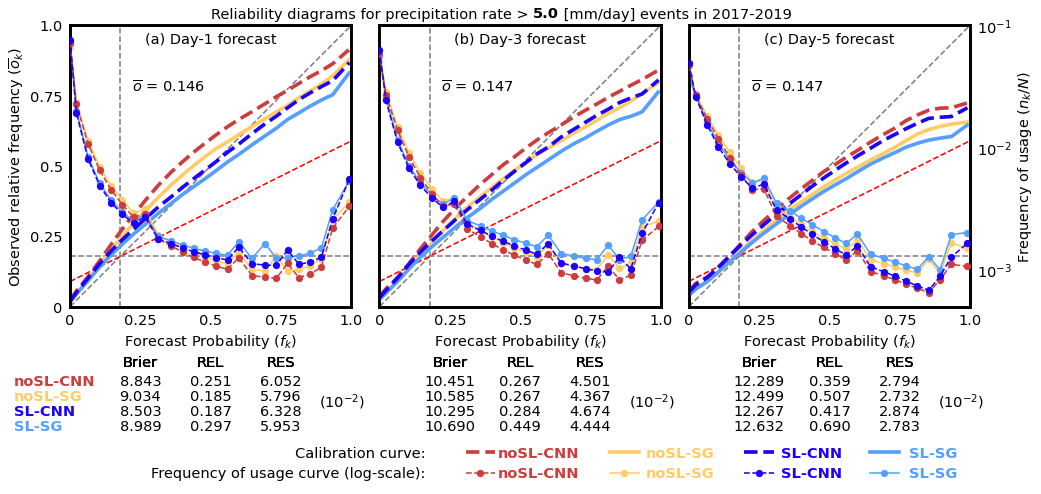

In [9]:
fig = plt.figure(figsize=(12, 12/(3.2)*1.45), dpi=dpi_)
titles = ['(a) Day-1 forecast', '(b) Day-3 forecast', '(c) Day-5 forecast']

handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(3, 5, height_ratios=[1, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [5e-4, 1e-1]
YLAB = [1e-3, 1e-2, 1e-1]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar_5mm[1], 0.5*fake_x + 0.5*o_bar_5mm[3], 0.5*fake_x + 0.5*o_bar_5mm[5]]

AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_re.append(plt.subplot(gs[0, j]))
for j in [0, 2, 4]:
    AX_da.append(plt.subplot(gs[2, j]))
for i in range(3):
    AX_hi.append(AX_re[i].twinx())

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')
    ax.set_xlabel('Forecast Probability ($f_k$)', fontsize=14)
    
for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelright=False)
    ax.set_xlim([0, 1])
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)
        
AX_re[0].set_ylabel('Observed relative frequency ($\overline{o}_k$)', fontsize=14)
AX_hi[-1].set_ylabel('Frequency of usage ($n_k/N$)', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[-1].tick_params(axis="both", which="both", labelright=True)

methods = ['bcnn', 'base', 'scnn', 'sl',]
Z = [5, 4, 5, 4, 4]
labels = ['noSL-CNN', 'noSL-SG', 'SL-CNN', 'SL-SG', 'GEFS']
label_ = ['                ', '              ', '            ', '          ', '        ']

for i, ind in enumerate([1, 3, 5]):
    
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    
    AX_re[i].axvline(x=o_bar_5mm[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar_5mm[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        # 1.0 mm/day
        temp_p = PLOT_5mm['{}_p'.format(method)][ind, :]
        temp_f = PLOT_5mm['{}_f'.format(method)][ind, :]
        temp_ux = PLOT_5mm['{}_p'.format('scnn')][ind, :]
        temp_uy = USE_5mm['{}'.format(method)][ind, :]
        
        handle_lines += AX_re[i].plot(temp_p, temp_f, color=C[m], linestyle=LS[m], 
                                      linewidth=3.5, zorder=Z[m], label=label_[m])
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])
        

AX_re[0].text(0.22, 0.75, '$\overline{o}$ = 0.146', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.22, 0.75, '$\overline{o}$ = 0.147', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.22, 0.75, '$\overline{o}$ = 0.147', ha='left', va='bottom', fontsize=14)

ax_t1 = fig.add_axes([0.5*(3.2-2.2)/3.2, 1.0, (2.2/3.2), 0.045])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Reliability diagrams for precipitation rate > ', '5.0', 
                                         ' [mm/day] events in 2017-2019'], 
                                         ['k',]*3, [14,]*3, ['normal', 'bold', 'normal'])

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))
    
loc_y = [0.53, 0.352, 0.173, 0.,]

table_content = ['bs', 'rel', 'res']
table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, ind in enumerate([1, 3, 5]):
    
    AX_da[i].text(1.05, 0.5*0.75, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.75, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)
        for c, key in enumerate(table_content):
            AX_da[i].text(locx_heads[c], loc_y[m], '{:.3f}'.format(1e2*BS_5mm['{}_{}'.format(method, key)][ind]), 
                             ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
            
for m, method in enumerate(methods):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                     fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)
    
ax_box = fig.add_axes([0, -0.125, 1.0, 0.1])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='40%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='40%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='60%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='60%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve: ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of usage curve (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);

LG = ax_lg1.legend(handles=[handle_lines[0], handle_lines[2], handle_lines[4], handle_lines[6]], 
                   bbox_to_anchor=(1, 1.5), ncol=4, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=[handle_lines[1], handle_lines[3], handle_lines[5], handle_lines[7]], 
                    bbox_to_anchor=(1, 1.5), ncol=4, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.125, 0.5, 'noSL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.125+0.275, 0.5, 'noSL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.125+0.525, 0.5, 'SL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.125+0.7625, 0.5, 'SL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg1.transAxes)

ax_lg2.text(0.125, 0.5, 'noSL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.125+0.275, 0.5, 'noSL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.125+0.525, 0.5, 'SL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.125+0.7625, 0.5, 'SL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg2.transAxes)

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_ERA_Reliability_5mm.png', format='png', **fig_keys)

## 30 mm

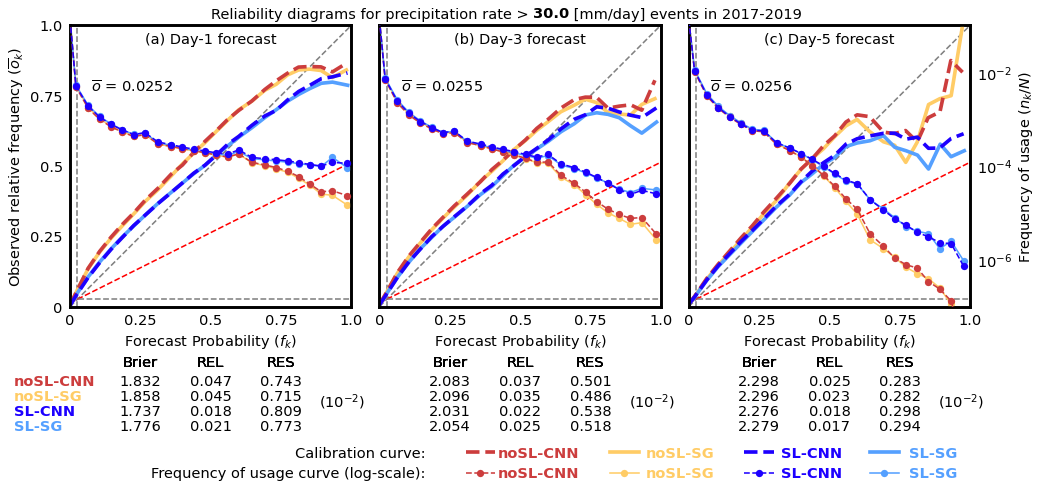

In [10]:
fig = plt.figure(figsize=(12, 12/(3.2)*1.45), dpi=dpi_)
titles = ['(a) Day-1 forecast', '(b) Day-3 forecast', '(c) Day-5 forecast']

handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(3, 5, height_ratios=[1, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [1e-7, 1e-1]
YLAB = [1e-6, 1e-4, 1e-2]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar_30mm[1], 0.5*fake_x + 0.5*o_bar_30mm[3], 0.5*fake_x + 0.5*o_bar_30mm[5]]

AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_re.append(plt.subplot(gs[0, j]))
for j in [0, 2, 4]:
    AX_da.append(plt.subplot(gs[2, j]))
for i in range(3):
    AX_hi.append(AX_re[i].twinx())

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')
    ax.set_xlabel('Forecast Probability ($f_k$)', fontsize=14)
    
for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelright=False)
    ax.set_xlim([0, 1])
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)
        
AX_re[0].set_ylabel('Observed relative frequency ($\overline{o}_k$)', fontsize=14)
AX_hi[-1].set_ylabel('Frequency of usage ($n_k/N$)', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[-1].tick_params(axis="both", which="both", labelright=True)

methods = ['bcnn', 'base', 'scnn', 'sl',]
Z = [5, 4, 5, 4, 4]
labels = ['noSL-CNN', 'noSL-SG', 'SL-CNN', 'SL-SG', 'GEFS']
label_ = ['                ', '              ', '            ', '          ', '        ']

for i, ind in enumerate([1, 3, 5]):
    
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    
    AX_re[i].axvline(x=o_bar_30mm[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar_30mm[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        # 1.0 mm/day
        temp_p = PLOT_30mm['{}_p'.format(method)][ind, :]
        temp_f = PLOT_30mm['{}_f'.format(method)][ind, :]
        temp_ux = PLOT_30mm['{}_p'.format('scnn')][ind, :]
        temp_uy = USE_30mm['{}'.format(method)][ind, :]
        
        handle_lines += AX_re[i].plot(temp_p, temp_f, color=C[m], linestyle=LS[m], 
                                      linewidth=3.5, zorder=Z[m], label=label_[m])
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])
        

AX_re[0].text(0.075, 0.75, '$\overline{o}$ = 0.0252', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.075, 0.75, '$\overline{o}$ = 0.0255', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.075, 0.75, '$\overline{o}$ = 0.0256', ha='left', va='bottom', fontsize=14)

ax_t1 = fig.add_axes([0.5*(3.2-2.2)/3.2, 1.0, (2.2/3.2), 0.045])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Reliability diagrams for precipitation rate > ', '30.0', 
                                         ' [mm/day] events in 2017-2019'], 
                                         ['k',]*3, [14,]*3, ['normal', 'bold', 'normal'])

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))
    
loc_y = [0.53, 0.352, 0.173, 0.,]

table_content = ['bs', 'rel', 'res']
table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, ind in enumerate([1, 3, 5]):
    
    AX_da[i].text(1.05, 0.5*0.75, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.75, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)
        for c, key in enumerate(table_content):
            AX_da[i].text(locx_heads[c], loc_y[m], '{:.3f}'.format(1e2*BS_30mm['{}_{}'.format(method, key)][ind]), 
                             ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
            
for m, method in enumerate(methods):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                     fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)
    
ax_box = fig.add_axes([0, -0.125, 1.0, 0.1])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='40%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='40%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='60%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='60%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve: ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of usage curve (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);

LG = ax_lg1.legend(handles=[handle_lines[0], handle_lines[2], handle_lines[4], handle_lines[6]], 
                   bbox_to_anchor=(1, 1.5), ncol=4, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=[handle_lines[1], handle_lines[3], handle_lines[5], handle_lines[7]], 
                    bbox_to_anchor=(1, 1.5), ncol=4, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.125, 0.5, 'noSL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.125+0.275, 0.5, 'noSL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.125+0.525, 0.5, 'SL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.125+0.7625, 0.5, 'SL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg1.transAxes)

ax_lg2.text(0.125, 0.5, 'noSL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.125+0.275, 0.5, 'noSL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.125+0.525, 0.5, 'SL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.125+0.7625, 0.5, 'SL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg2.transAxes)

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_ERA_Reliability_30mm.png', format='png', **fig_keys)

## 90-th

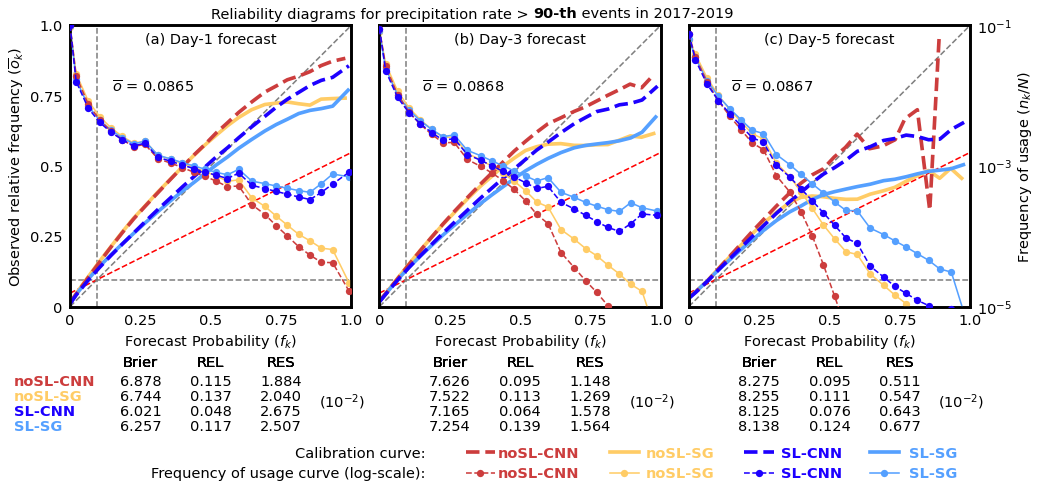

In [11]:
fig = plt.figure(figsize=(12, 12/(3.2)*1.45), dpi=dpi_)
titles = ['(a) Day-1 forecast', '(b) Day-3 forecast', '(c) Day-5 forecast']

handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(3, 5, height_ratios=[1, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [1e-5, 1e-1]
YLAB = [1e-5, 1e-3, 1e-1]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar_90th[1], 0.5*fake_x + 0.5*o_bar_90th[3], 0.5*fake_x + 0.5*o_bar_90th[5]]

AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_re.append(plt.subplot(gs[0, j]))
for j in [0, 2, 4]:
    AX_da.append(plt.subplot(gs[2, j]))
for i in range(3):
    AX_hi.append(AX_re[i].twinx())

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')
    ax.set_xlabel('Forecast Probability ($f_k$)', fontsize=14)
    
for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelright=False)
    ax.set_xlim([0, 1])
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)
        
AX_re[0].set_ylabel('Observed relative frequency ($\overline{o}_k$)', fontsize=14)
AX_hi[-1].set_ylabel('Frequency of usage ($n_k/N$)', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[-1].tick_params(axis="both", which="both", labelright=True)

methods = ['bcnn', 'base', 'scnn', 'sl',]
Z = [5, 4, 5, 4, 4]
labels = ['noSL-CNN', 'noSL-SG', 'SL-CNN', 'SL-SG', 'GEFS']
label_ = ['                ', '              ', '            ', '          ', '        ']

for i, ind in enumerate([1, 3, 5]):
    
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    
    AX_re[i].axvline(x=o_bar_90th[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar_90th[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        # 1.0 mm/day
        temp_p = PLOT_90th['{}_p'.format(method)][ind, :]
        temp_f = PLOT_90th['{}_f'.format(method)][ind, :]
        temp_ux = PLOT_90th['{}_p'.format('scnn')][ind, :]
        temp_uy = USE_90th['{}'.format(method)][ind, :]
        
        handle_lines += AX_re[i].plot(temp_p, temp_f, color=C[m], linestyle=LS[m], 
                                      linewidth=3.5, zorder=Z[m], label=label_[m])
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])
        

AX_re[0].text(0.15, 0.75, '$\overline{o}$ = 0.0865', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.15, 0.75, '$\overline{o}$ = 0.0868', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.15, 0.75, '$\overline{o}$ = 0.0867', ha='left', va='bottom', fontsize=14)

ax_t1 = fig.add_axes([0.5*(3.2-2.2)/3.2, 1.0, (2.2/3.2), 0.045])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Reliability diagrams for precipitation rate > ', '90-th', 
                                         ' events in 2017-2019'], 
                                         ['k',]*3, [14,]*3, ['normal', 'bold', 'normal'])

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))
    
loc_y = [0.53, 0.352, 0.173, 0.,]

table_content = ['bs', 'rel', 'res']
table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, ind in enumerate([1, 3, 5]):
    
    AX_da[i].text(1.05, 0.5*0.75, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.75, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)
        for c, key in enumerate(table_content):
            AX_da[i].text(locx_heads[c], loc_y[m], '{:.3f}'.format(1e2*BS_90th['{}_{}'.format(method, key)][ind]), 
                             ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
            
for m, method in enumerate(methods):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                  fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)
    
ax_box = fig.add_axes([0, -0.125, 1.0, 0.1])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='40%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='40%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='60%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='60%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve: ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of usage curve (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);

LG = ax_lg1.legend(handles=[handle_lines[0], handle_lines[2], handle_lines[4], handle_lines[6]], 
                   bbox_to_anchor=(1, 1.5), ncol=4, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=[handle_lines[1], handle_lines[3], handle_lines[5], handle_lines[7]], 
                    bbox_to_anchor=(1, 1.5), ncol=4, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.125, 0.5, 'noSL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.125+0.275, 0.5, 'noSL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.125+0.525, 0.5, 'SL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.125+0.7625, 0.5, 'SL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg1.transAxes)

ax_lg2.text(0.125, 0.5, 'noSL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.125+0.275, 0.5, 'noSL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.125+0.525, 0.5, 'SL-CNN', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.125+0.7625, 0.5, 'SL-SG', ha='left', va='center', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg2.transAxes)

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_ERA_Reliability_90th.png', format='png', **fig_keys)

## All combined (too large)

In [18]:
# fig = plt.figure(figsize=(12, 12/(3.2)*(4.1)-1.0))
# titles = [['(a) Day-1 forecast', '(b) Day-3 forecast', '(c) Day-5 forecast'],
#           ['(d) Day-1 forecast', '(e) Day-3 forecast', '(f) Day-5 forecast'],
#           ['(g) Day-1 forecast', '(h) Day-3 forecast', '(i) Day-5 forecast'],]

# handle_title = []
# handle_lines = []
# handle_marker = []

# gs = gridspec.GridSpec(6, 5, height_ratios=[1, 0.4, 1, 0.4, 1, 0.3], width_ratios=[1-0.075, 0.1+0.075]*2+[1-0.075])

# YLIM = [[7.5e-4, 1e-1], 
#         [5e-6, 1e-1],
#         [5e-5, 1e-1]]
# YLAB = [[1e-3, 5e-3, 1e-2, 5e-2, 1e-1], 
#         [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
#         [1e-4, 1e-3, 1e-2, 1e-1]]

# # no skill line
# fake_x = np.linspace(0, 1, 100)
# fake_y = [0.5*fake_x + 0.5*o_bar_5mm[2], 
#           0.5*fake_x + 0.5*o_bar_30mm[2],
#           0.5*fake_x + 0.5*o_bar_90th[2],]

# AX_re = [[], [], []] # reliability curve axis
# AX_hi = [[], [], []] # freq of use axis
# AX_da = [[], [], []] # data axis

# for i in range(6):
#     if i%2 == 0:
#         for j in [0, 2, 4]:
#             AX_re[i//2].append(plt.subplot(gs[i, j]))
#     else:
#         for j in [0, 2, 4]:
#             AX_da[i//2].append(plt.subplot(gs[i, j]))
            
# for n in range(3):
#     for i in range(3):
#         AX_hi[n].append(AX_re[n][i].twinx())

# plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

# ax_t1 = fig.add_axes([0.5*(3/3.2-0.5), 1.0, 0.55, 0.01667])
# ax_t1.set_axis_off()
# ax_t1.text(0, 1, 'Reliability diagrams for precipitation rate > ', ha='left', va='top', fontsize=14, transform=ax_t1.transAxes);
# ax_t1.text(0.65, 1, '1.0', ha='left', va='top', fontsize=14, fontweight='bold', transform=ax_t1.transAxes);
# ax_t1.text(0.71, 1, '[mm/day] events', ha='left', va='top', fontsize=14, transform=ax_t1.transAxes);

# ax_t2 = fig.add_axes([0.5*(3/3.2-0.5), 2.7/4.1, 0.55, 0.01667])
# ax_t2.set_axis_off()
# ax_t2.text(0, 1, 'Reliability diagrams for precipitation rate > ', ha='left', va='top', fontsize=14, transform=ax_t2.transAxes);
# ax_t2.text(0.65, 1, '30.0', ha='left', va='top', fontsize=14, fontweight='bold', transform=ax_t2.transAxes);
# ax_t2.text(0.73, 1, '[mm/day] events', ha='left', va='top', fontsize=14, transform=ax_t2.transAxes);

# ax_t3 = fig.add_axes([0.5*(3/3.2-0.5), 1.3/4.1, 0.55, 0.01667])
# ax_t3.set_axis_off()
# ax_t3.text(0, 1, 'Reliability diagrams for precipitation rate > ', ha='left', va='top', fontsize=14, transform=ax_t3.transAxes);
# ax_t3.text(0.65, 1, '90-th', ha='left', va='top', fontsize=14, fontweight='bold', transform=ax_t3.transAxes);
# ax_t3.text(0.745, 1, 'percentile events', ha='left', va='top', fontsize=14, transform=ax_t3.transAxes);

# for i, AX in enumerate(AX_re):
#     for ax in AX:
#         ax = gu.ax_decorate_box(ax)
#         #ax.grid(linewidth=1.5, linestyle=':', color='0.5');
#         ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
#         ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')
        
#         ax.tick_params(axis="both", which="both", labelbottom=True)
#         ax.set_xlim([0, 1])
#         ax.set_ylim([0, 1])
#         ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
#         ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
#         ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
#         ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
#         ax.set_aspect('equal')
#         if i == 0:
#             handle_title.append(ax.text(0.5, 0.02, 'Forecast Probability ($f_k$)', 
#                                         ha='center', va='bottom', fontsize=14, transform=ax.transAxes))
#         else:
#             ax.text(0.5, 0.02, 'Forecast probability ($f_k$)', 
#                     ha='center', va='bottom', fontsize=14, transform=ax.transAxes)
            
# for i, AX in enumerate(AX_da):
#     for ax in AX:
#         ax.set_axis_off()

# for i, AX in enumerate(AX_hi):
#     for ax in AX:
#         ax = gu.ax_decorate_box(ax)
#         ax.tick_params(axis="both", which="both", labelright=False)
#         ax.set_xlim([0, 1])
#         ax.set_yscale('log')
#         ax.set_ylim(YLIM[i])
#         ax.set_yticks(YLAB[i])
        
# for i in range(3):
#     AX_re[i][0].set_ylabel('Observed relative frequency ($\overline{o}_k$)', fontsize=14)
#     AX_hi[i][-1].set_ylabel('Frequency of usage ($n_k/N$)', fontsize=14)
#     AX_re[i][0].tick_params(axis="both", which="both", labelleft=True)
#     AX_hi[i][-1].tick_params(axis="both", which="both", labelright=True)

# methods = ['scnn', 'sl', 'base']
# Z = [5, 4, 3]
# labels = ['SL-CNN', 'SL-SG', 'noSL-SG']

# for i, ind in enumerate([1, 3, 5]):
    
#     handle_title.append(AX_re[0][i].text(0.5, 0.975, titles[0][i], fontsize=14, 
#                                          ha='center', va='top', transform=AX_re[0][i].transAxes))
#     handle_title.append(AX_re[1][i].text(0.5, 0.975, titles[1][i], fontsize=14, 
#                                          ha='center', va='top', transform=AX_re[1][i].transAxes))
#     handle_title.append(AX_re[2][i].text(0.5, 0.975, titles[2][i], fontsize=14, 
#                                          ha='center', va='top', transform=AX_re[2][i].transAxes))
    
#     AX_re[0][i].axvline(x=o_bar_5mm[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
#     AX_re[0][i].axhline(y=o_bar_5mm[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
#     AX_re[0][i].text(0.27, 0.75, '$\overline{o}$ = 0.229', ha='left', va='bottom', fontsize=14)
    
#     AX_re[1][i].axvline(x=o_bar_30mm[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
#     AX_re[1][i].axhline(y=o_bar_30mm[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
#     AX_re[1][i].text(0.07, 0.75, '$\overline{o}$ = 0.0284', ha='left', va='bottom', fontsize=14)

#     AX_re[2][i].axvline(x=o_bar_90th[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
#     AX_re[2][i].axhline(y=o_bar_90th[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
#     AX_re[2][i].text(0.14, 0.75, '$\overline{o}$ = 0.0997', ha='left', va='bottom', fontsize=14)
    
#     for m, method in enumerate(methods):
#         # 1.0 mm/day
#         temp_p = PLOT_5mm['{}_p'.format(method)][ind, :]
#         temp_f = PLOT_5mm['{}_f'.format(method)][ind, :]
#         temp_ux = PLOT_5mm['{}_p'.format('scnn')][ind, :]
#         temp_uy = USE_5mm['{}'.format(method)][ind, :]
#         handle_lines += AX_re[0][i].plot(temp_p, temp_f, color=C[m], linestyle=LS[m], 
#                                          linewidth=3.5, zorder=Z[m], label=labels[m])
#         handle_lines += AX_hi[0][i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
#                                          marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=labels[m])
#         # 30 mm/day
#         temp_p = PLOT_30mm['{}_p'.format(method)][ind, :]
#         temp_f = PLOT_30mm['{}_f'.format(method)][ind, :]
#         temp_ux = PLOT_30mm['{}_p'.format('scnn')][ind, :]
#         temp_uy = USE_30mm['{}'.format(method)][ind, :]
#         AX_re[1][i].plot(temp_p, temp_f, color=C[m], linestyle=LS[m], 
#                          linewidth=3.5, zorder=Z[m])
#         AX_hi[1][i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
#                          marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2)
#         # 90-th
#         temp_p = PLOT_90th['{}_p'.format(method)][ind, :]
#         temp_f = PLOT_90th['{}_f'.format(method)][ind, :]
#         temp_ux = PLOT_90th['{}_p'.format('scnn')][ind, :]
#         temp_uy = USE_90th['{}'.format(method)][ind, :]
        
#         AX_re[2][i].plot(temp_p, temp_f, color=C[m], linestyle=LS[m], 
#                          linewidth=3.5, zorder=Z[m])
#         AX_hi[2][i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
#                          marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2)        
        
# for handle in handle_title:
#     handle.set_bbox(dict(facecolor='w', edgecolor='none', zorder=2))

    
# loc_y = [[0.53, 0.385, 0.24], 
#          [0.53, 0.385, 0.24], 
#          [0.333-0.02, 0.167-0.04, 0.0-0.06]]

# table_content = ['bs', 'rel', 'res']
# table_heads = ['Brier', 'REL', 'RES']
# locx_heads = [0.375+0.02, 0.625+0.02, 0.875+0.02]

# for i, ind in enumerate([1, 3, 5]):
#     for m, method in enumerate(methods):
#         for j in range(3):
#             AX_da[0][i].text(locx_heads[j], 0.675, table_heads[j], ha='center', va='bottom', 
#                              fontsize=14, transform=AX_da[0][i].transAxes)
#             AX_da[1][i].text(locx_heads[j], 0.675, table_heads[j], ha='center', va='bottom', 
#                              fontsize=14, transform=AX_da[1][i].transAxes)
#             AX_da[2][i].text(locx_heads[j], 0.5, table_heads[j], ha='center', va='bottom', 
#                              fontsize=14, transform=AX_da[2][i].transAxes)
            
#         for c, key in enumerate(table_content):
#             AX_da[0][i].text(locx_heads[c], loc_y[0][m], '{:0.5f}'.format(BS_5mm['{}_{}'.format(method, key)][ind]), 
#                              ha='center', va='bottom', fontsize=14, transform=AX_da[0][i].transAxes)
#             AX_da[1][i].text(locx_heads[c], loc_y[1][m], '{:0.5f}'.format(BS_30mm['{}_{}'.format(method, key)][ind]), 
#                              ha='center', va='bottom', fontsize=14, transform=AX_da[1][i].transAxes)
#             AX_da[2][i].text(locx_heads[c], loc_y[2][m], '{:0.5f}'.format(BS_90th['{}_{}'.format(method, key)][ind]), 
#                              ha='center', va='bottom', fontsize=14, transform=AX_da[2][i].transAxes)
#         for n in range(3):
#             AX_da[n][i].text(0, loc_y[n][m], labels[m], ha='left', va='bottom', color=C[m], 
#                              fontsize=14, fontweight='bold', transform=AX_da[n][i].transAxes)

# ax_box = fig.add_axes([0.0, -0.035, 0.715, 0.03])
# ax_box.set_axis_off()
# ax_lw = inset_axes(ax_box, height='50%', width='44%', borderpad=0, loc=2)
# ax_lw.text(1, -0.5, 'Reliability curve: ', ha='right', va='bottom', fontsize=14, transform=ax_lw.transAxes);
# ax_lg = inset_axes(ax_box, height='50%', width='56%', borderpad=0, loc=1)

# LG = ax_lg.legend(handles=[handle_lines[0], handle_lines[2], handle_lines[4]], 
#                   bbox_to_anchor=(1, 1), ncol=3, prop={'size':14}, fancybox=False);
# LG.get_frame().set_facecolor('none')
# LG.get_frame().set_linewidth(0)
# LG.get_frame().set_alpha(1.0)

# ax_lw1 = inset_axes(ax_box, height='50%', width='44%', borderpad=0, loc=3)
# ax_lw1.text(1, -0.5, 'Frequency of usage curve (log-scale): ', ha='right', va='bottom', fontsize=14, 
#             transform=ax_lw1.transAxes);
# ax_lg1 = inset_axes(ax_box, height='50%', width='56%', borderpad=0, loc=4)

# LG1 = ax_lg1.legend(handles=[handle_lines[1], handle_lines[3], handle_lines[5]], 
#                   bbox_to_anchor=(1, 1), ncol=3, prop={'size':14}, fancybox=False);
# LG1.get_frame().set_facecolor('none')
# LG1.get_frame().set_linewidth(0)
# LG1.get_frame().set_alpha(1.0)

# ax_lw.set_axis_off()
# ax_lg.set_axis_off()
# ax_lw1.set_axis_off()
# ax_lg1.set_axis_off()

# # # Save figure
# # fig.savefig(fig_dir+'AnEn_ERA_Reliability.png', format='png', **fig_keys)